In [ ]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [ ]:
def create_dataset(ds, look_back=1):
  X_data, Y_data = [], []
  for i in range(len(ds)-look_back):
    X_data.append(ds[i:(i+look_back), 0])
    Y_data.append(ds[i+look_back, 0])

  return np.array(X_data), np.array(Y_data)

In [ ]:
df = pd.read_csv("GOOG.csv", index_col="Date", parse_dates=True)

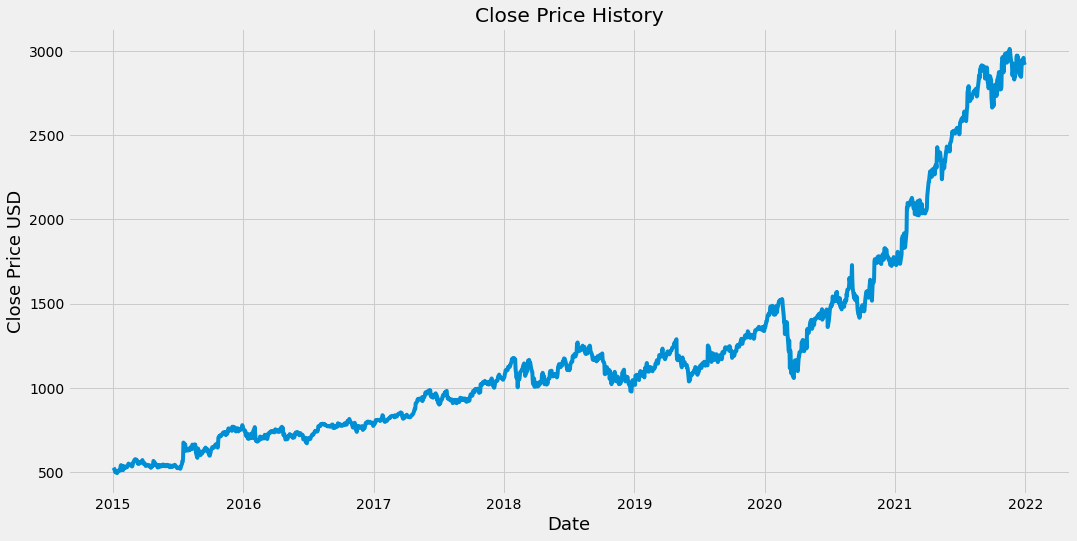

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD", fontsize=18)
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len, :]

In [ ]:
x_train, y_train = create_dataset(train_data, 60)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

(1350, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1350/1350 [==============================] - 42s 29ms/step - loss: 5.8734e-04


In [ ]:
test_data = scaled_data[training_data_len-60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)


352

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


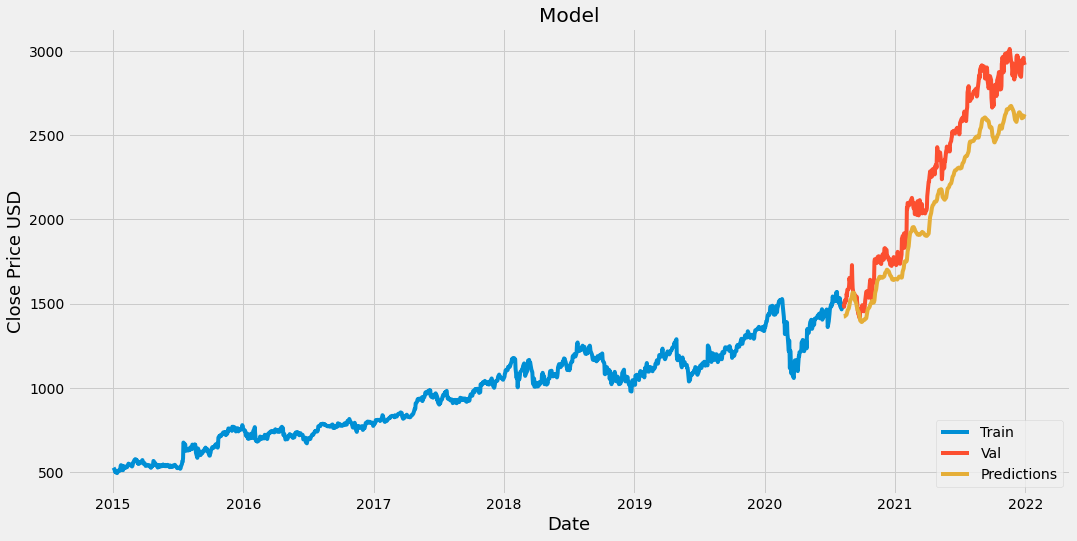

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()
